In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("MSE_by_pos_contact_joint0.csv")

In [3]:
df

,Iteration,q_0,q_3,joint,MSE
0,0,-1.5708,-2.7,0,1.468178
1,0,-1.5708,-2.7,3,0.591966
2,0,-1.5708,-2.2,0,1.657028
3,0,-1.5708,-2.2,3,0.357573
4,0,-1.5708,-0.7,0,3.121091
...,...,...,...,...,...
1655,9,1.4292,-0.3,3,0.790478
1656,9,1.5292,-1.2,0,2.758002
1657,9,1.5292,-1.2,3,0.063715
1658,9,1.5292,-0.6,0,2.203593


In [4]:
sum(df.joint==3)

830

In [5]:
np.mean(df.loc[df.joint == 0, "MSE"])

np.float64(0.7171459418024159)

In [6]:
np.mean(df.loc[df.joint == 3, "MSE"])

np.float64(0.4072065186569266)

In [7]:
grid_q0 = np.full((26,32), np.nan)
grid_q3 = np.full((26,32), np.nan)
counts_q0 = np.zeros((26,32))
counts_q3 = np.zeros((26,32))
mse_q0 = 0
mse_q3 = 0
for idx, row in df.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    if row.joint == 0:
        grid_q0[y_pos, x_pos] = row.MSE
        counts_q0[y_pos, x_pos] += 1
        mse_q0 += row.MSE
    if row.joint == 3:
        grid_q3[y_pos, x_pos] = row.MSE
        counts_q3[y_pos, x_pos] += 1
        mse_q3 += row.MSE


In [8]:
mse_q0, mse_q3

(np.float64(595.2311316960056), np.float64(337.9814104852491))

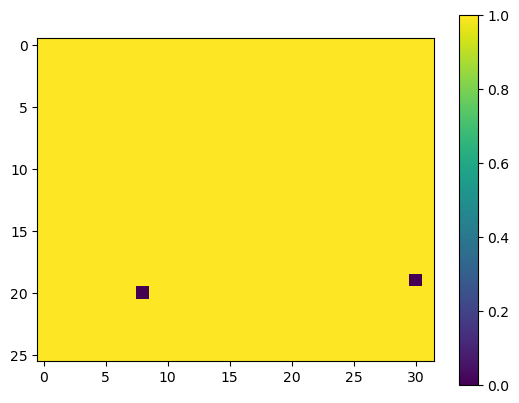

In [9]:
plt.imshow(counts_q0)
plt.colorbar()

In [10]:
rng = np.random.default_rng(42)
k_fold = 10
labels = pd.read_csv("data/samples.csv")
shuffeled_idxs = np.arange(len(labels))
print(shuffeled_idxs[-1])
rng.shuffle(shuffeled_idxs)
block_length = len(shuffeled_idxs)//k_fold
idxs = []
for i in range(k_fold):
    idxs.append(shuffeled_idxs[i*block_length:(i+1)*block_length])

831


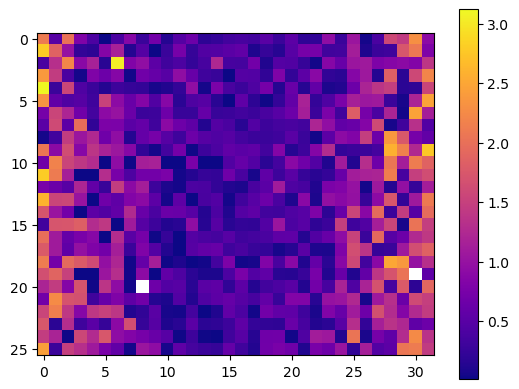

In [11]:
plt.imshow(grid_q0, cmap="plasma")
plt.colorbar()

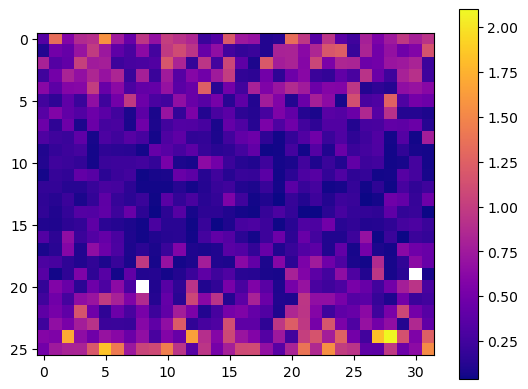

In [12]:
plt.imshow(grid_q3, cmap="plasma")
plt.colorbar()

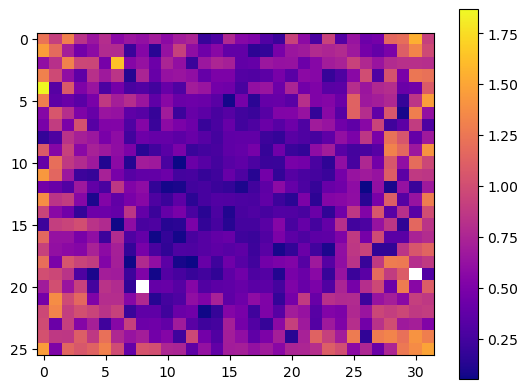

In [13]:
plt.imshow((grid_q0 + grid_q3)/2, cmap="plasma")
plt.colorbar()

(0.0, 1.5)

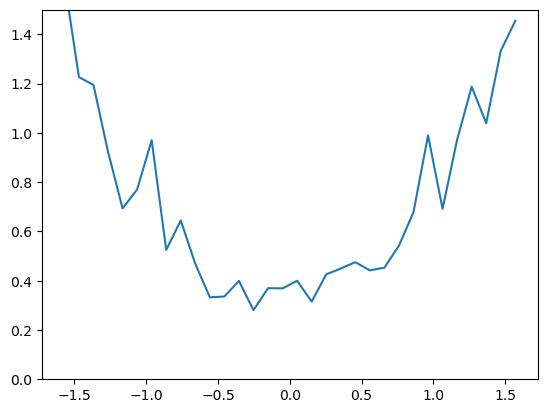

In [14]:
MSE_q0 = np.nanmean(grid_q0, axis=0)
plt.plot(np.linspace(-1.57, 1.57, 32), MSE_q0)
plt.ylim((0,1.5))

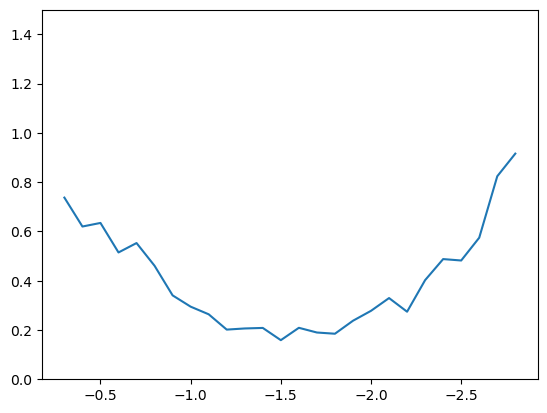

In [15]:
MSE_q3 = np.nanmean(grid_q3, axis=1)
plt.plot(-0.3-0.1*np.arange(26), MSE_q3)
plt.ylim((0,1.5))
plt.gca().xaxis.set_inverted(True)

In [16]:
np.nanmean(grid_q3)

np.float64(0.4072065186569266)